<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M2_AST_02_Regression_Models_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IITM and TalentSprint
### Assignment 2: Regression Models

## Learning Objectives

At the end of the experiment, you will be able to:

* have an overview of the basics of Machine Learning
* understand the implementation of Train/Test Split
* develop an understanding of Least Squares, Learning Curves
* perform Linear Regression and KNN Regressor
* have an understanding of Regularization of Linear Models


### Introduction

**Machine learning** is a subfield of artificial intelligence (AI). The goal of machine learning is to understand the structure of data and model(fit) the data so that it can accurately predict the label or output for similar unseen data.

**Machine Learning use cases:**

Detecting tumors in brain scans, automatically classifying news articles, automatically flagging offensive comments on discussion forums,
summarizing long documents automatically,
creating a chatbot or a personal assistant,
detecting credit card fraud,
making your app react to voice commands,
building an intelligent bot for a game.

**Machine Learning Workflow:**

1. Frame the ML problem by looking at the business need
2. Gather the data and do Data Munging/Wrangling for each subproblem
3. Explore different models, perform V&V and shortlist promising candidates
4. Fine-tune shortlisted models and combine them together to form the final  solution
5. Present your solution  
6. Deploy


**Model training and testing**

![wget](https://cdn.iisc.talentsprint.com/CDS/Images/model_train_test1.png)



### Training, Validation, and Test Set

A machine learning algorithm splits the Dataset into two sets.

Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into two subsets:

**Training Dataset:** The sample of data used to fit the model.

**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

We usually split the data around 20%-80% between the testing and training stages.

**Validation Set:** This is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets.


<img src="https://miro.medium.com/max/700/1*aNPC1ifHN2WydKHyEZYENg.png" alt="drawing" width="500"/>


#### Prerequisites for using train_test_split()

We will use scikit-learn, or sklearn which has many packages for data science and machine learning.

**Applying train_test_split()**

You need to import:

1.   train_test_split()
2.   NumPy

We import NumPy because, in supervised machine learning applications, you’ll typically work with two such sequences:

* A two-dimensional array with the inputs (x)
* A one-dimensional array with the outputs (y)






**sklearn.model_selection.train_test_split(arrays, options)**

* **arrays** is the sequence of lists, NumPy arrays, pandas DataFrames, or similar array-like objects that hold the data you want to split. All these objects together make up the dataset and must be of the same length.

* **options** are the optional keyword arguments that you can use to get desired behavior:

  * **train_size** is the number that defines the size of the training set.

  * **test_size** is the number that defines the size of the test set. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

  * **random_state** is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

  * **shuffle** is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

  * **stratify** is an array-like object that, if not None, determines how to use a stratified split.



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2419592" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9845319358" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_02_Regression_Models_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/breast_cancer.csv")
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/iris.csv")
    ipython.magic("sx wget -q https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Hitters.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [4]:
# Importing Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn Libraries
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Let us use a small dataset to understand how to implement a train and test split

#### Creating a simple dataset to work with

In [5]:
# inputs in the two-dimensional array X
X = np.arange(1, 25).reshape(12, 2)

# outputs in the one-dimensional array y
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [6]:
print(X)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [23 24]]


In [7]:
print(y)

[0 1 1 0 1 0 0 1 1 0 1 0]


#### Splitting input and output datasets

In [11]:
# SPLIT WITH TEST SIZE=4
# YOUR CODE HERE
test_size = X.shape[0] // 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [15]:
# DISPLAY X_train
# YOUR CODE HERE
train_size = X.shape[0] // 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_size, random_state=0)
print(X_train)

[[21 22]
 [ 5  6]
 [17 18]
 [ 3  4]
 [15 16]
 [19 20]
 [ 7  8]
 [ 1  2]
 [11 12]]


In [13]:
# DISPLAY X_test
# YOUR CODE HERE
print(X_test)

[[13 14]
 [23 24]
 [ 9 10]]


In [14]:
# DISPLAY y_train
# YOUR CODE HERE
print(y_train)

[1 1 1 1 1 0 0 0 0]


In [17]:
# DISPLAY y_test
# YOUR CODE HERE
print(y_test)

[0 0 1]


### Develop an understanding of Least Squares

**Least Squares** method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.

**Calculate Line Of Best Fit**

A more accurate way of finding the line of best fit is the least square method.

Use the following steps to find the equation of line of best fit for a set of ordered pairs $(x_1,y_1),(x_2,y_2),...(x_n,y_n)$.

**Step 1:** Calculate the slope ‘m’ by using the following formula:

$$m = \frac{\sum \left ( x-\bar{x} \right )*\sum \left ( y-\bar{y} \right )}{\sum \left ( x-\bar{x} \right )^{2}}$$


**Step 2:** Compute the y -intercept of the line by using the formula:

$$c = y - mx$$

**Step 3:** Substitute the values in the final equation

$$y = mx + c$$

* y: dependent variable
* m: the slope of the line
* x: independent variable
* c: y-intercept


As an example, we will try to find the least squares regression line for the below data set:

\begin{array} {|r|r|}\hline Hours Spent & Grade \\\hline 6 & 82 \\ \hline 10 & 88 \\ \hline 2 & 56 \\ \hline 4 & 64 \\ \hline 6 & 77 \\ \hline 7 & 92 \\ \hline 0 & 23 \\ \hline 1 & 41 \\ \hline 8 & 80 \\ \hline 5 & 59 \\ \hline 3 & 47 \\ \hline  \end{array}

$x$ = HoursSpent

$y$ = Grade

$\bar{x}$ = 4.72

$\bar{y}$ = 64.45


\begin{array} {|r|r|}\hline Hours Spent & Grade &  x - \bar{x}  & y - \bar{y} & (x - \bar{x})*(y - \bar{y}) \\ \hline 6 & 82 & 1.27 & 17.55 & 22.33 \\ \hline 10 & 88 & 5.27 & 23.55 & 124.15 \\ \hline 2 & 56 & -2.73 & -8.45 & 23.06 \\ \hline 4 & 64 & -0.73 & -0.45 & 0.33 \\ \hline 6 & 77 & 1.27 & 12.55 & 15.97 \\ \hline 7 & 92 & 2.27 & 27.55 & 62.60 \\ \hline 0 & 23 & -4.73 & -41.45 & 195.97 \\ \hline 1 & 41 & -3.73 & -23.42 & 87.42 \\ \hline 8 & 80 & 3.27 & 15.55 & 50.88 \\ \hline 5 & 59 & 0.27 & -5.45 & -1.49 \\ \hline 3 & 47 & -1.73 & -17.45 & 30.15 \\ \hline  \end{array}


$$\sum \left ( x-\bar{x} \right )*\sum \left ( y-\bar{y} \right ) = 611.36$$

$$\sum \left ( x-\bar{x} \right )^{2} = 94.18$$

$$m = \frac{611.36}{94.18}$$

$$m = 6.49$$

**Calculate the intercept:**

$$c = y - mx$$

$$c = 64.45-(6.49*4.72)$$

$$c = 64.45 – 30.63$$

$$c = 30.18$$

Now that we have all the values to fit into the equation. If we want to know the predicted grade of someone who spends 2.35 hours on their essay, all we need to do is substitute that in for X.

$$y =  (6.49 * X) + 30.18 $$

$$y = (6.49 * 2.35) + 30.18$$

$$y = 45.43$$










### Example: Ordinary least squares Linear Regression

Ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable.

Geometrically, this is seen as the sum of the squared distances, parallel to the axis of the dependent variable, between each data point in the set and the corresponding point on the regression surface—the smaller the differences, the better the model fits the data.

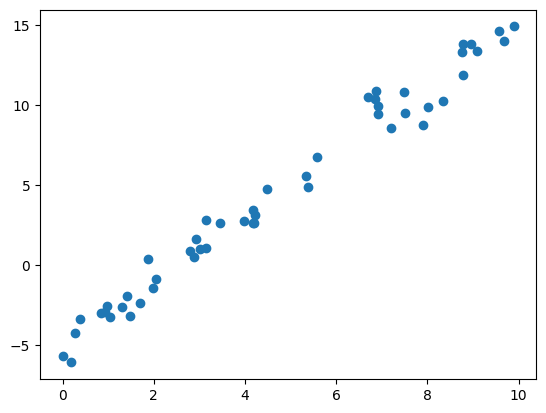

In [18]:
# Generating Sample data

rng = np.random.RandomState(1)              # instantiate random number generator
x = 10 * rng.rand(50)                       # generate 50 random numbers from uniform distribution
y = 2 * x - 5 + rng.randn(50)               # use 50 random numbers from normal distribution as noise



# VISUALIZE THE DATA USING SCATTER PLOTS
plt.scatter(x, y)
plt.show()

# YOUR CODE HERE


**Using Scikit-Learn's Linear Regression estimator to fit the above data and construct the best-fit line**

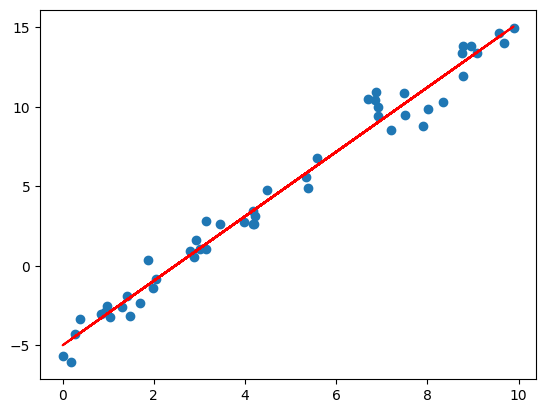

In [22]:
model = LinearRegression(fit_intercept=True)                   # instantiate LinearRegression

# FIT AND PREDICT
model.fit(x[:, np.newaxis], y)                                 # fit the model

# YOUR CODE HERE
# VISUALIZE THE DATA USING SCATTER PLOTS
# AND PLOT THE FITTED LINE

plt.scatter(x, y)
plt.plot(x, model.predict(x[:, np.newaxis]), color='red')
# YOUR CODE HERE


### Learning Curves

Learning curve in machine learning is used to assess how models will perform with varying numbers of training samples.  This is achieved by monitoring the training and validation scores (model accuracy) with an increasing number of training samples.

Below image showcases 'Learning curves representing high bias and high variance'.

- orange dashed line - represent training
- blue line - represent validation
- black dashed line - desired model accuracy

![wget](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-19-at-6.22.21-AM-1.png)

### Example: Simple linear regression combined with the polynomial preprocessor

#### Polynomial Features

Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature $X$, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in $X$, e.g. $X^2$. This process can be repeated for each input variable in the dataset, creating a transformed version of each. And, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.

In [23]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))# using a pipeline to string these operations together

#### Creating data to fit into the model

In [54]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# YOUR CODE HERE to call above function
X, y = make_data(40)

In [55]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(ax, estimator, X, y, **kwargs):
    N, train_lc, val_lc = learning_curve(estimator, X, y, cv=7,
                                        train_sizes=np.linspace(0.1, 1, 5))
    ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax.hlines(np.mean(train_lc[-1]), N[0], N[-1], color='blue', ls='--')
    ax.hlines(np.mean(val_lc[-1]), N[0], N[-1], color='red', ls='--')

    ax.set_ylim(0, 1)
    ax.set_xlabel('training size')
    ax.set_ylabel('score')
    ax.set_title('Learning Curve (degree={0})'.format(kwargs['degree']))
    ax.legend(loc='best')

#### Learning curve in Scikit-Learn

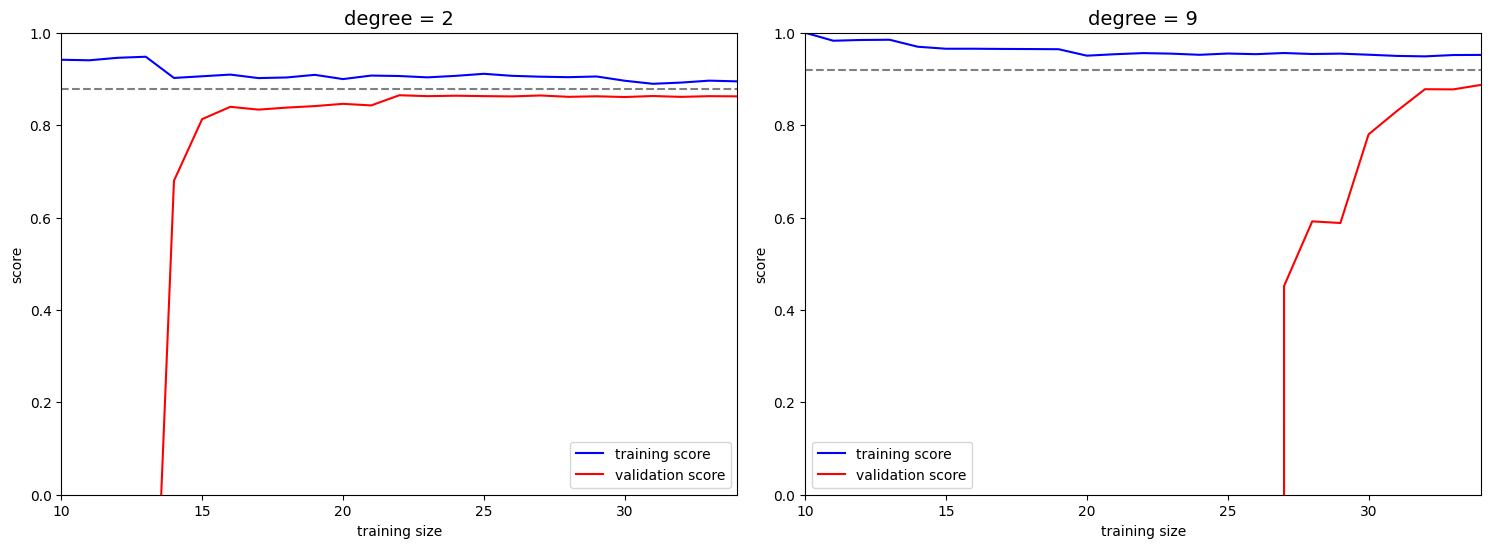

In [56]:
# learning curve for generated dataset with a second-order polynomial model and a ninth-order polynomial

# INSTANTIATE A FIGURE AND MAKE IT 1 ROW AND 2 COLUMNS
# YOUR CODE HERE

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


# WRITE CODE TO VISUALIZE THE LEARNING CURVE
# YOUR CODE HERE

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


### Example: Machine Learning Workflow using Linear-Regression with Iris-Dataset

In this example, we will be using the “Iris” dataset.

The iris dataset contains the following data:

50 samples of 3 different types of iris (150 samples total)

<center>
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width= 600 px/>
</center>

Measurements: sepal length, sepal width, petal length, petal width

<center>
<img src="https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png" width= 200 px/>
</center>

The format for the data: (sepal length, sepal width, petal length, petal width)

#### Dataset

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

Problem statement: Predict the sepal length (cm) of the iris flowers


#### Loading Iris Data

In [57]:
iris = datasets.load_iris()

Creating Dataframe

In [58]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

Displaying Dataframe

In [59]:
# VISUALIZE THE DATAFRAME
# YOUR CODE HERE
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Exploring the iris dataset

In [60]:
# print the names of the four features
# YOUR CODE HERE
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [61]:
# print integers representing the Iris_Type of each observation
# 0, 1, and 2 represent different Iris_Type
# YOUR CODE HERE
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Creating DataFrames

In [62]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['Iris_Type'])

In [63]:
# coding categorical variables
def converter(Iris_Type):
    if Iris_Type == 0:
        return 'setosa'
    elif Iris_Type == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [64]:
target_df['Iris_Type'] = target_df['Iris_Type'].apply(converter)

Concatenating the Dataframes (iris_df and target_df)

In [65]:
# YOUR CODE HERE
iris_df = pd.concat([iris_df, target_df], axis=1)

In [66]:
# generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# YOUR CODE HERE
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
# summary of the DataFrame
# YOUR CODE HERE
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris_Type          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualization of Iris Data - Creating a pairplot of the iris data set to check which flower species seems to be most separable


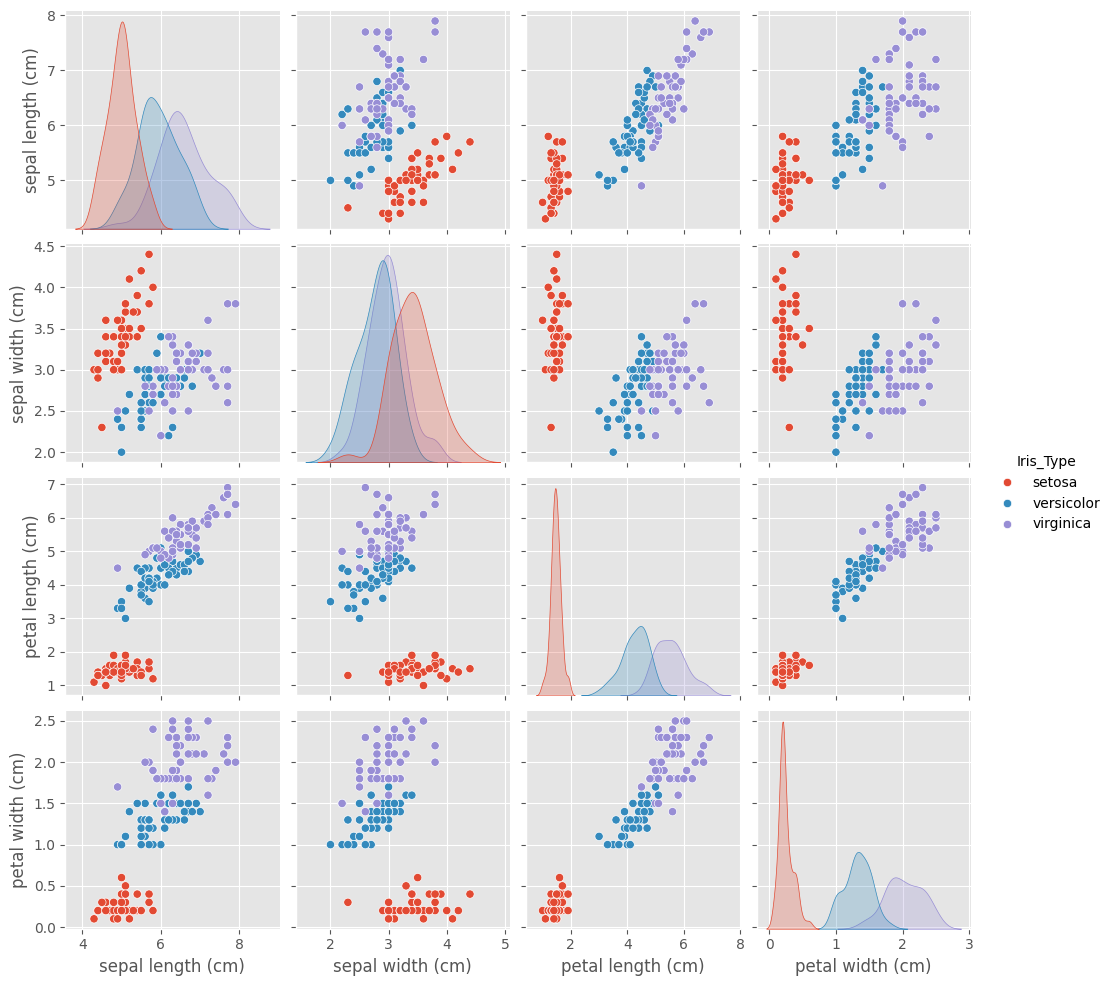

In [68]:
plt.style.use('ggplot')

# PLOT USING PAIRPLOT
sns.pairplot(iris_df, hue='Iris_Type')
# YOUR CODE HERE

### Modeling and Prediction (Linear Regression)

In [69]:
# Converting Objects to Numerical dtype
# YOUR CODE HERE
iris_df['Iris_Type'] = iris_df['Iris_Type'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [71]:
# Variables
# YOUR CODE HERE
X = iris_df.drop('Iris_Type', axis=1)
y = iris_df['Iris_Type']


In [72]:
# Splitting the Dataset into one-third for test data
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [74]:
# Training/Fitting the Model
# YOUR CODE HERE
lr.fit(X_train, y_train)

LinearRegression()

In [75]:
# Making Predictions
# YOUR CODE HERE
pred = lr.predict(X_test)

In [76]:
# Evaluating Model's Performance
# Mean absolute error, mean_squared error, root-mean squared error
# YOUR CODE HERE

print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1598427861123997
Mean Squared Error: 0.04260034113761791
Mean Root Squared Error: 0.20639850081242817


Testing the results

In [77]:
iris_df.loc[6]

,6
sepal length (cm),4.6
sepal width (cm),3.4
petal length (cm),1.4
petal width (cm),0.3
Iris_Type,0.0


Predicting the value

In [78]:
pred = lr.predict(X_test)
# YOUR CODE HEREs
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 1.2084217247289815
Actual Sepal Length (cm): 4.6


### KNN Regressor

KNN is a simple yet dual-purpose algorithm that can be used for both classification and regression applications. The KNN algorithm utilizes similarity among the feature's data points to predict the values of any new data points. This means that the new point is assigned a value based on the closeness/nearness with the training dataset.

The nearest values are based on distance functions namely - Manhattan, Eucledian, Hamming and general Minowski distances.

For exploring the Scikit-learn's KNN Regressor, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).


In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
# Create a KNN model
regr_knn = KNeighborsRegressor(n_neighbors=5)

In [81]:
# Fit the data
regr_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [82]:
# Predict the test data points
pred1 = regr_knn.predict(X_test)
pred1

array([1. , 0. , 2. , 1. , 1. , 0. , 1. , 2. , 1.4, 1. , 1.8, 0. , 0. ,
       0. , 0. , 1.4, 2. , 1. , 1. , 2. , 0. , 1.8, 0. , 2. , 2. , 2. ,
       2. , 2. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 1.6, 1. , 0. , 0. ,
       0. , 1.8, 1.2, 1. , 0. , 0. , 1. , 1.4, 2. , 1. , 2. ])

In [83]:
# Evaluating KNN Model's Performance
# YOUR CODE HEREs
print('Mean Absolute Error:', mean_absolute_error(y_test, pred1))
print('Mean Squared Error:', mean_squared_error(y_test, pred1))

Mean Absolute Error: 0.05199999999999999
Mean Squared Error: 0.019999999999999997


### Let us now apply the above learnings to perform a linear regression based price prediction, using a 'Real estate' dataset (Practice)

Linear regression model implementation

  * Fit the model
  * Do the prediction
  * Plot the straight line for the predicted data using linear regression model



#### Dataset

In this example, we will be using the “Real estate price prediction” dataset

- Transaction date (purchase)
- House age
- Distance to the nearest MRT station (metric not defined)
- Amount of convenience stores
- Location (latitude and longitude)
- House price of unit area

Problem statement: Predict the house price of unit area based on various features provided such as house age, location, etc.

#### Loading the dataset

In [84]:
!wget https://cdn.extras.talentsprint.com/CDS/Datasets/Real_estate.csv

--2025-07-11 08:46:41--  https://cdn.extras.talentsprint.com/CDS/Datasets/Real_estate.csv
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21968 (21K) [application/octet-stream]
Saving to: ‘Real_estate.csv’

Real_estate.csv     100%[===================>]  21.45K  --.-KB/s    in 0s      

2025-07-11 08:46:42 (256 MB/s) - ‘Real_estate.csv’ saved [21968/21968]



In [85]:
df = pd.read_csv('Real_estate.csv')

# Taking only the selected two attributes from the dataset
#df_binary = df[['X2 house age', 'Y house price of unit area']]
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Dropping non-useful columns

In [86]:
#dropping columns

# YOUR CODE HERE
df.drop('No', axis=1, inplace=True)

#### Finding if there are any null values

In [87]:
# YOUR CODE HERE
df.isnull().sum()

,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


#### Exploring the data scatter

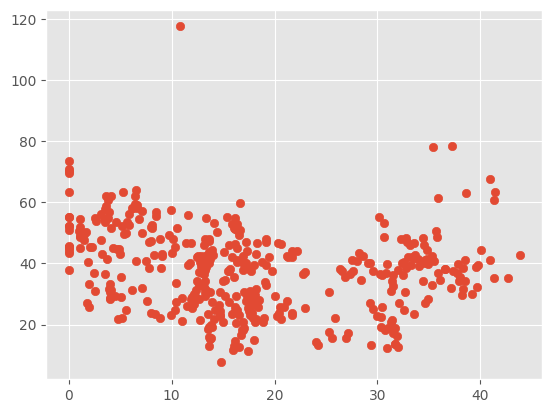

In [88]:
# YOUR CODE HERE
plt.scatter(df['X2 house age'], df['Y house price of unit area'])

#### Training our model

In [89]:
# Separating the data into independent and dependent variables

# YOUR CODE HERE
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

Splitting the data into training and testing data

In [90]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Training the Linear Regression model on the Training set

In [91]:
# YOUR CODE HERE
lr.fit(X_train, y_train)

LinearRegression()

Training/Fitting the Model

In [92]:
# YOUR CODE HERE
lr.fit(X_train, y_train)

LinearRegression()

#### Exploring the results

In [98]:
# Data scatter of predicted values

# YOUR CODE HERE
y_pred = lr.predict(X_test)


In [99]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.088876014407224
Mean Squared Error: 71.48570304941146
Mean Root Squared Error: 8.454921823968064


Text(0, 0.5, 'Y-Pred')

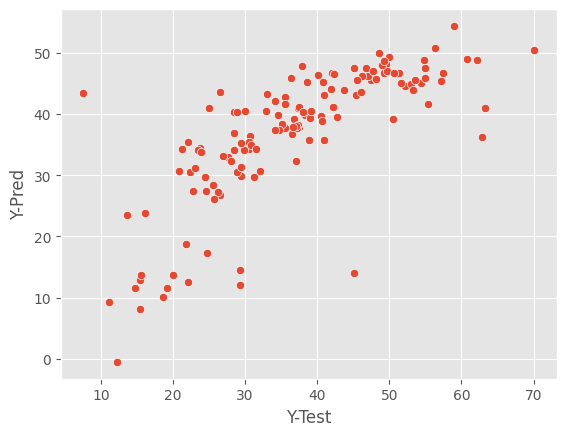

In [100]:
# Data scatter of predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

### Theory Questions


1. What is the difference between the training set and the test set?

    The training set is a subset of your data on which your model will learn how to predict the dependent variable with the independent variables.

    The test set is the complimentary subset from the training set, on which you will evaluate your model to see if it manages to predict correctly the dependent variable with the independent variables.



2. Why do we split on the dependent variable?

    We want to have well-distributed values of the dependent variable in the training and test set. For example, if we only had the same value of the dependent variable in the training set, our model wouldn't be able to learn any correlation between the independent and dependent variables.




3. What is the purpose of a validation set?

    The Validation Set is a separate section of your dataset that you will use during training to get a sense of how well your model is doing on data that are not being used in training.



4. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

   If the model performs poorly to new instances, then it has overfitted on the training data. To solve this, we can do any of the following three: get more data, implement a simpler model, or eliminate outliers or noise from the existing data set.

### Please answer the questions below to complete the experiment:




In [ ]:
# @title What is the most common criterion used to determine the best-fitting line?   { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "The line that goes through the most points", "The line that has the same number of points above it as below it", "The line that minimizes the sum of squared errors of prediction"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")